# A Data Science Practice Template
## Creating a cycle of practice for data science

## A simple template to practice data science

Developing a skill is much easier if we are able to streamline the process of practicing it. For me, improving my data science skills involves weekly and sometimes daily practice of the different aspects of doing data science work: data collection, data cleaning and preprocessing, data visualization, modelling and more. 

__In this post I will share my basic template for practicing data science.__

---

One good way to simplify the cycle of practicing your data science skills is to have clear in your head what are the steps that take you from data to insight. In terms of practice a good way of looking at it is to see it as a 6 steps process: 

1. **_Find a dataset_**  containing some problem of challenge

2. **_Pick a question_** about such dataset that can be answered with basic data science

3. **_Clean up_** the data

4. Do **_basic analysis_** on the data to answer the question you had initially

5. **_Present the results_** in some standard format like a jupyter notebook

6. **Reconsider** if the results you presented indeed answer your question and what could be improved

## Practical example

To illustrate these steps, let's pick a dataset and go through each step mentioned before.

### 1. Find a dataset

The main issue I found with this step is actually deciding which dataset to use. The reason why I think this is a problem is because we can either do something like always use the same dataset and get bored over time (after practicing with the same dataset for like 100 times...) or getting overwhelmed by the amount of potential datasets that we can use (the internet is full of them).

To avoid issues, let's automate this part by using the [kaggle api](https://github.com/Kaggle/kaggle-api) and a simple rule to randomize our pick of a dataset, in such a way that we won't have to spend energy deciding and can get down to the actual coding quicker. 

I do this by following a principle that *__automate all decisions that can be automated effectively.__*

The point is to have an awareness of the time and energy you spend on decisions during your practice to see if those can be automated without disregarding the learning potential involved in taking such decisions.

Now, my process here involves my only picking a word, this time I chose *learning*. Now, all I have to do is use the kaggle api to search the datasets available involving this particular word and we are good to go. It is not 100% random, but is just random enough that I don't feel that friction to start that might make me less productive.

The command is: `kaggle datasets list -s learning`

The output:

```
ref    title    size    lastUpdated    downloadCount    voteCount    usabilityRating  
kaggle/kaggle-survey-2018                                       2018 Kaggle Machine Learning & Data Science Survey    4MB  2018-11-03 22:35:07          14892        965  0.85294116       
kaggle/kaggle-survey-2017                                       2017 Kaggle Machine Learning & Data Science Survey    4MB  2017-10-27 22:03:03          22297        821  0.8235294        
alopez247/pokemon                                               Pokémon for Data Mining and Machine Learning        715KB  2017-03-05 15:01:26          10102        234  0.85294116       
rocki37/open-university-learning-analytics-dataset              Open University Learning Analytics Dataset           84MB  2018-10-27 22:30:00           3595        124  0.7058824        
rohan0301/unsupervised-learning-on-country-data                 Unsupervised Learning on Country Data                 5KB  2020-06-17 07:45:45           3956         79  0.8235294        
.
.
.
.
.
```

From the options that I got I chose the `open-university-learning-analytics-dataset` so to download I use:

`kaggle datasets download rocki37/open-university-learning-analytics-dataset`

Now we unzip the data and save it to a folder called: `learning_analytics`

`unzip -d open-university-learning-analytics-dataset.zip learning_analytics`

Now we are ready to start!

### 2. Pick a question

This part is tricky because you can either have a question and find a dataset to answer it, or you can have a dataset and discover a question by exploring a little bit the dataset.

To avoid getting into chicken and egg type of confusions I want to explore a bit the dataset to find my question, because since this is a practice process I might not always have interesting questions that need answering, or I might have questions for which I have no idea which dataset to use to answer them, so for purposes of speeding up the process I prefer to pick a dataset and start from there. 

Let's start by importing our dependencies, loading the data and selecting the relevant tables. Here, I am already starting from some knowledge about the data and which tables to use.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import lux
import os
import pathlib
import glob
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

csv_files = glob.glob("/home/lucassoares/Desktop/projects/mediumPosts/data_science_template/learning_analytics/anonymiseddata/*.csv")

dfs = [pd.read_csv(filename) for filename in csv_files]
assesments = csv_files[3]
df_assessments = pd.read_csv(assesments)
scores = csv_files[4]
df_scores = pd.read_csv(scores)
student_info = csv_files[5]
df_student_info = pd.read_csv(student_info)

Now let's take a look at the data:

In [4]:
df_scores

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [5]:
df_assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [6]:
df_student_info

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


This dataset is the ["Open University Learning Analytics Dataset"](https://analyse.kmi.open.ac.uk/open_dataset) which is an anonymised dataset on courses and virtual learning environment data. It has a lot of aspects to it but I want to focus on a small subset of the data so I don't get lost on details. 
The tables I chosed here were:
- __Student's performance__: Containing the scores of the students in each assesment or exam performed.
- __Student information__:Containing information about the students like region they are from, how many credits they had studied up to taking the exam, whether or not they pass and more.

A detailed description of the dataset and each table can be found [here](https://analyse.kmi.open.ac.uk/open_dataset).

Upon looking at the data I came up with a few questions:
- What is the average score of the students?
- What is the average score per region?
- What is the distribution of passed and failed per assessment.
- What is the ideal amount of time to submit the work to increase chances of passing the exam?
- Is there a relationship between age and score performance?
- Could I write a binary classifier that predicts if the student will pass given all of the available information about the student and the course?
- Is there a relationship between the number of credits studied up to that point and the student's performance?

As you can see there are many questions that can be asked about a given dataset. So how to start? Should I start answering all of them? Should I start with the easiest ones?

My rule for this is simple, *__I pick one question or group of questions that best fits my practicing goals and available time for a given day__*. What I mean is, if I only want to do a quick practice to keep basic data analysis fresh in my mind I won't pick a question that will involve something that takes too long like writing a custom neural network, or exploring fancy machine learning models. 

But, if on a given day I want to write something more interesting and complex I will pick either all of the questions or a *__group of questions that form a consistent narrative__* and allow me to practice more complicated modelling and analysis. It will all depend on you setting clear goals at the beggining!

The point to make here is *__pick a narrative that can be summarized by a question__*, and fill in the gaps of the narrative (like the building blocks of a history) with smaller questions that form a cohesive structure.

For the purpose of this article let's keep it simple.

My question will be:
*__What is the profile of the student that passes the course versus the one that do not?__*

<span style="color: red"> Maybe rephrase it a bit better. </span> 


### 3. Clean up the data

Now that I chose my question I can start investigating the data to find the answers that I care about. In order to do that effectively I want to clean the data and do some basic preprocessing. The most important thing here will be to remove NaNs and columns that will not contribute to the analysis (to answer the questions that I care about) and I want to unify the tables into one that has all the columns with the relevant information.


In [7]:
from IPython.display import display_html
from itertools import chain,cycle

def remove_irrelevant_cols(df_student_info,df_scores,df_assessments):
    df_student_info.drop("code_presentation", axis=1,inplace=True)
    df_scores.drop("is_banked",axis=1,inplace=True)
    df_assessments.drop("code_presentation", axis=1, inplace=True)
    return df_student_info,df_scores,df_assessments


def findNaNCols(df):
    for col in df:
        print(f"Column: {col}")
        num_NaNs = df[col].isnull().sum()
        print(f"Number of NaNs: {num_NaNs}")

        
def remove_all_NaNs():
    return df.dropna(inplace=True)


def get_type_of_assessment(x):
    try:
        return assessment_id_type_dict[x]
    except:
        return 

    
def display_side_by_side(*args,titles=cycle([''])):
    # source: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+=f'<h1>{title}</h1>'
        html_str+='<th style="text-align:center"><td style="horizontal-align:left">'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

Let's start by finding how many NaN entries we have in each table:

In [8]:
print("df_student_info")
findNaNCols(df_student_info)
print("***")
print("df_scores")
findNaNCols(df_scores)
print("***")
print("df_assessments")
findNaNCols(df_assessments)
print("***")

df_student_info
Column: code_module
Number of NaNs: 0
Column: code_presentation
Number of NaNs: 0
Column: id_student
Number of NaNs: 0
Column: gender
Number of NaNs: 0
Column: region
Number of NaNs: 0
Column: highest_education
Number of NaNs: 0
Column: imd_band
Number of NaNs: 1111
Column: age_band
Number of NaNs: 0
Column: num_of_prev_attempts
Number of NaNs: 0
Column: studied_credits
Number of NaNs: 0
Column: disability
Number of NaNs: 0
Column: final_result
Number of NaNs: 0
***
df_scores
Column: id_assessment
Number of NaNs: 0
Column: id_student
Number of NaNs: 0
Column: date_submitted
Number of NaNs: 0
Column: is_banked
Number of NaNs: 0
Column: score
Number of NaNs: 173
***
df_assessments
Column: code_module
Number of NaNs: 0
Column: code_presentation
Number of NaNs: 0
Column: id_assessment
Number of NaNs: 0
Column: assessment_type
Number of NaNs: 0
Column: date
Number of NaNs: 11
Column: weight
Number of NaNs: 0
***


Now let's remove the NaN entries from their respective columns as well as remove the irrelevant columns: `code_presentation` and `is_banked` which won't be important for the analysis.

In [9]:
df_student_info.dropna(subset=["imd_band"], inplace=True)
df_assessments.dropna(inplace=True)
df_student_info,df_scores,df_assessments = remove_irrelevant_cols(df_student_info,df_scores,df_assessments)

I am removing those because the `code_presentation` columns refers to a simple identification code of the presentation to which a given assessment belongs, so it does not matter to understand the factors involved in  the student's performance. 

Let's take a look at what we have so far:

In [10]:
display_side_by_side(df_student_info.head(),df_scores.head(),df_assessments.head(), titles=['Students Information','Scores', "Assessments"])

Students Information 
 
 
 
 code_module 
 id_student 
 gender 
 region 
 highest_education 
 imd_band 
 age_band 
 num_of_prev_attempts 
 studied_credits 
 disability 
 final_result 
 
 
 
 
 0 
 AAA 
 11391 
 M 
 East Anglian Region 
 HE Qualification 
 90-100% 
 55<= 
 0 
 240 
 N 
 Pass 
 
 
 1 
 AAA 
 28400 
 F 
 Scotland 
 HE Qualification 
 20-30% 
 35-55 
 0 
 60 
 N 
 Pass 
 
 
 2 
 AAA 
 30268 
 F 
 North Western Region 
 A Level or Equivalent 
 30-40% 
 35-55 
 0 
 60 
 Y 
 Withdrawn 
 
 
 3 
 AAA 
 31604 
 F 
 South East Region 
 A Level or Equivalent 
 50-60% 
 35-55 
 0 
 60 
 N 
 Pass 
 
 
 4 
 AAA 
 32885 
 F 
 West Midlands Region 
 Lower Than A Level 
 50-60% 
 0-35 
 0 
 60 
 N 
 Pass 
 
 
 Scores 
 
 
 
 id_assessment 
 id_student 
 date_submitted 
 score 
 
 
 
 
 0 
 1752 
 11391 
 18 
 78.0 
 
 
 1 
 1752 
 28400 
 22 
 70.0 
 
 
 2 
 1752 
 31604 
 17 
 72.0 
 
 
 3 
 1752 
 32885 
 26 
 69.0 
 
 
 4 
 1752 
 38053 
 19 
 79.0 
 
 
 Assessments 
 
 
 
 code_module 
 id_assessment 
 assessment_type 
 date 
 weight 
 
 
 
 
 0 
 AAA 
 1752 
 TMA 
 19.0 
 10.0 
 
 
 1 
 AAA 
 1753 
 TMA 
 54.0 
 20.0 
 
 
 2 
 AAA 
 1754 
 TMA 
 117.0 
 20.0 
 
 
 3 
 AAA 
 1755 
 TMA 
 166.0 
 20.0 
 
 
 4 
 AAA 
 1756 
 TMA 
 215.0 
 30.0

Now, let's create a column called `assessment_type` to relate the scores with their respective assessment categories:
- `CMA`: computer marked assessment
- `TMA`: tutor marked assessment
- `Exam`: the exam or exams of the course

In [11]:
assessment_id_type_dict = dict(zip(df_assessments["id_assessment"],df_assessments["assessment_type"]))
df_scores["assessment_type"] = df_scores["id_assessment"].apply(get_type_of_assessment)
df_scores.dropna(inplace=True)

Let's take a look at `df_scores`:

In [12]:
df_scores

,id_assessment,id_student,date_submitted,score,assessment_type
0,1752,11391,18,78.0,TMA
1,1752,28400,22,70.0,TMA
2,1752,31604,17,72.0,TMA
3,1752,32885,26,69.0,TMA
4,1752,38053,19,79.0,TMA
...,...,...,...,...,...
173907,37443,527538,227,60.0,CMA
173908,37443,534672,229,100.0,CMA
173909,37443,546286,215,80.0,CMA
173910,37443,546724,230,100.0,CMA


Great, now let's merge everything together into one dataframe using the `merge()` method and removing the resulting NaN entries from the `score` and `studied_credits` columns:

In [13]:
df_merged = df_scores.merge(df_student_info, on='id_student',how="outer")
print(df_merged["score"].isnull().sum())
df_merged.dropna(subset=["score"],inplace=True)
df_merged["score"].isnull().sum()
print(df_merged["score"].isnull().sum())
print(df_merged["studied_credits"].isnull().sum())
df_merged.dropna(subset=["studied_credits"],inplace=True)
df_merged["studied_credits"].isnull().sum()
print(df_merged["studied_credits"].isnull().sum())


5768
0
7480
0


In [14]:
df_merged

,id_assessment,id_student,date_submitted,score,assessment_type,code_module,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,1752.0,11391,18.0,78.0,TMA,AAA,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass
1,1753.0,11391,53.0,85.0,TMA,AAA,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass
2,1754.0,11391,115.0,80.0,TMA,AAA,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass
3,1755.0,11391,164.0,85.0,TMA,AAA,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass
4,1756.0,11391,212.0,82.0,TMA,AAA,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201524,37439.0,573320,227.0,80.0,CMA,GGG,F,South East Region,Lower Than A Level,80-90%,35-55,0.0,30.0,N,Fail
201525,37440.0,573320,227.0,100.0,CMA,GGG,F,South East Region,Lower Than A Level,80-90%,35-55,0.0,30.0,N,Fail
201526,37441.0,573320,227.0,100.0,CMA,GGG,F,South East Region,Lower Than A Level,80-90%,35-55,0.0,30.0,N,Fail
201527,37442.0,573320,227.0,20.0,CMA,GGG,F,South East Region,Lower Than A Level,80-90%,35-55,0.0,30.0,N,Fail


The choices I am making here for this stage reflect my current intentions for this dataset and this practice session and do not correspond to a final word on how to deal with this type of data. There are many other actions that one could perform, but for now I think this will let me quickly run the analysis I want which will be covered next.

### 4. Basic analysis and present the results

Let's remember the question I set for myself in the beggining:
__*What are the major contributing factors to the score of a student?*__

A great tool to get a quick overview of the data without having to write much if any code is [`lux`](https://github.com/lux-org/lux) which is an amazing framework for quick automated data exploration and visualization. So, let's use it to get a quick overview of our dataset.

In [15]:
df_merged

,id_assessment,id_student,date_submitted,score,assessment_type,code_module,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,1752.0,11391,18.0,78.0,TMA,AAA,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass
1,1753.0,11391,53.0,85.0,TMA,AAA,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass
2,1754.0,11391,115.0,80.0,TMA,AAA,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass
3,1755.0,11391,164.0,85.0,TMA,AAA,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass
4,1756.0,11391,212.0,82.0,TMA,AAA,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201524,37439.0,573320,227.0,80.0,CMA,GGG,F,South East Region,Lower Than A Level,80-90%,35-55,0.0,30.0,N,Fail
201525,37440.0,573320,227.0,100.0,CMA,GGG,F,South East Region,Lower Than A Level,80-90%,35-55,0.0,30.0,N,Fail
201526,37441.0,573320,227.0,100.0,CMA,GGG,F,South East Region,Lower Than A Level,80-90%,35-55,0.0,30.0,N,Fail
201527,37442.0,573320,227.0,20.0,CMA,GGG,F,South East Region,Lower Than A Level,80-90%,35-55,0.0,30.0,N,Fail


Given that my interest is on the factors that are associated with the score of the students let's begin by looking at a distribution of scores:

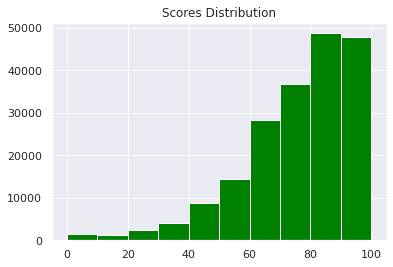

In [16]:
df_merged["score"].hist(color='green')
plt.title("Scores Distribution")
plt.show()

Now, let's look into the scores for the different types of assesments:
- Exams
- TMA: Tutor Marked Assessment
- CMA: Computer Marked Assessment

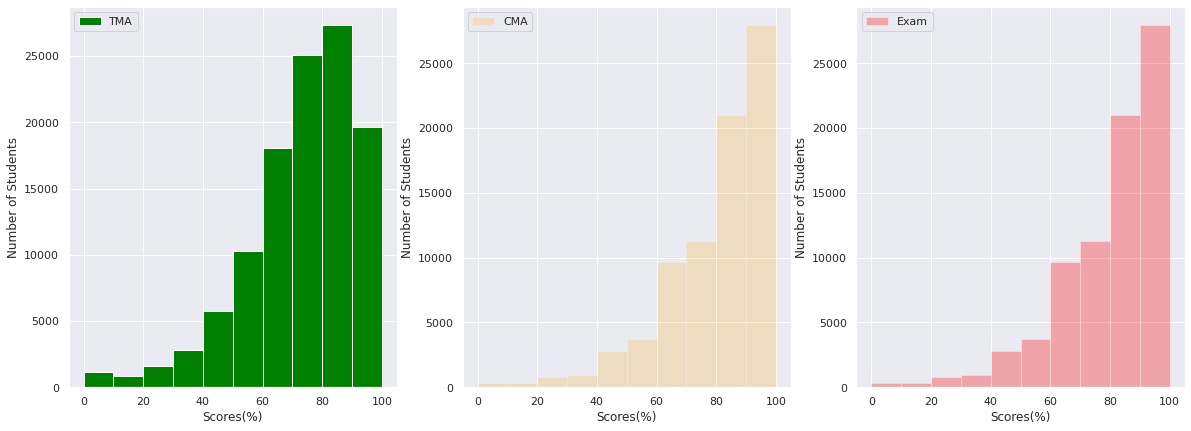

In [43]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
df_merged["score"][df_merged["assessment_type"]=="TMA"].hist(color="green",label="TMA")
plt.legend()
plt.xlabel("Scores(%)")
plt.ylabel("Number of Students")
plt.subplot(1,3,2)
df_merged["score"][df_merged["assessment_type"]=="CMA"].hist(color="orange",label="CMA",alpha=0.2)
plt.legend()
plt.xlabel("Scores(%)")
plt.ylabel("Number of Students")
plt.subplot(1,3,3)
df_merged["score"][df_merged["assessment_type"]=="CMA"].hist(color="red",label="Exam",alpha=0.3)
plt.legend()
plt.xlabel("Scores(%)")
plt.ylabel("Number of Students")
plt.show()

<span style="color: red"> check with Beatriz if it makes sense to put these distributions like this</span> 

Let's consider the average score per type of assessment:

In [18]:
for col in df_scores["assessment_type"].unique():
    print(f"Average score for {col}")
    print(df_scores["score"][df_scores["assessment_type"]==col].mean())

Average score for TMA
72.5633924663878
Average score for CMA
81.02705346888426
Average score for Exam
63.546800382043934


Ok so it seems that the average score is higher for the computer marked assessments followed by the tutor marked assessment and, as one should expect the exams have the worst scoring performance.

Let's start digging by looking at the potential relationship between studed credits and score performance, one should expect that students with more studied credits should have better performance

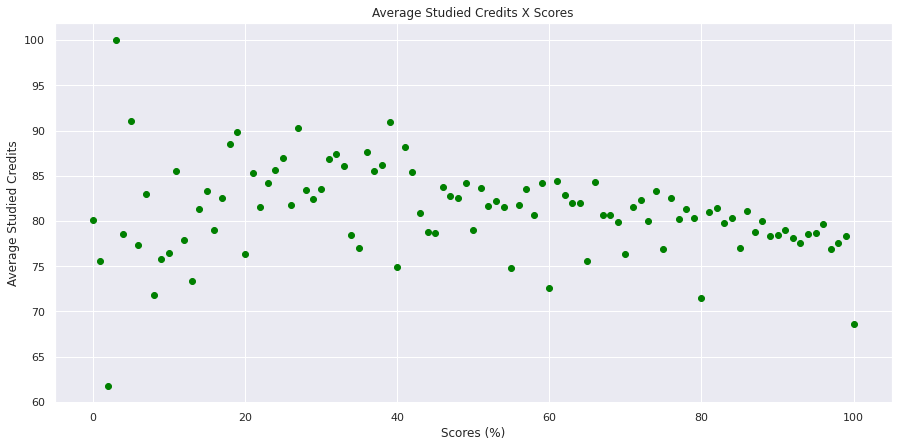

In [45]:
avg_studied_credits_per_score = df_merged.groupby("score")["studied_credits"].mean()
scores_bins = sorted(df_merged["score"].unique())
plt.figure(figsize=(15,7))
plt.title("Average Studied Credits X Scores")
plt.scatter(scores_bins,avg_studied_credits_per_score,color="green")
plt.xlabel("Scores (%)")
plt.ylabel("Average Studied Credits");

In [20]:
pearsonr(df_merged["score"],df_merged["studied_credits"])

(-0.05601315081954174, 1.2536559468075267e-134)

As we can see from the scatter plot and by running a simple pearson correlation, the number of credits and the score performance are slightly negatively correlated, so nothing too striking to take notice but our initial hypothesis has been disproven.

Now, let's look at the number of days to submit and the performance, I would expect that students that delivery too early don't do as well, but students that take too long also don't do as well with the peak being somewhere in the middle 

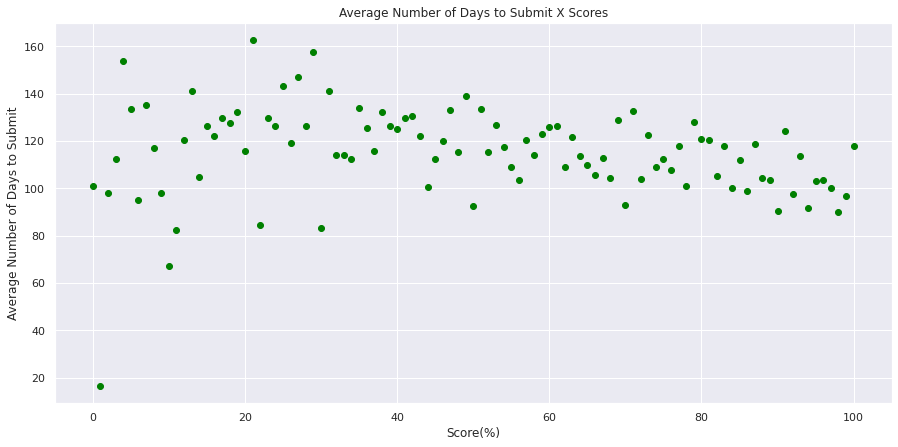

In [49]:
avg_date_submitted = df_merged.groupby("score")["date_submitted"].mean()
avg_date_submitted
scores_bins = sorted(df_merged["score"].unique())
plt.figure(figsize=(15,7))
plt.title("Average Number of Days to Submit X Scores")
plt.scatter(scores_bins,avg_date_submitted,color="green")
plt.xlabel("Score(%)")
plt.ylabel("Average Number of Days to Submit");

In [22]:
pearsonr(df_merged["date_submitted"],df_merged["score"])

(-0.020750337032287382, 6.150386473714662e-20)

Again for number of days to submit a very small and insignificant negative correlation, showing that the best grades were not necessarily obtained by taking longer to submit nor the opposite.

Now, let's look now at the profile of students that pass the course versus students that fail the course or withdrawn from the course

In [23]:
pass_index = (df_merged["final_result"]=="Pass") | (df_merged["final_result"]=="Distinction")
df_pass = df_merged[pass_index]

fail_index = (df_merged["final_result"]=="Fail") | (df_merged["final_result"]=="Withdrawn")
df_fail = df_merged[fail_index]

Let's begin with the number of people that pass versus the number of people that failed or withdrawn:

In [24]:
print(f"Number of people that passed the course: {len(df_pass)}")
print(f"Number of people that failed the course: {len(df_fail)}")

Number of people that passed the course: 137503
Number of people that failed the course: 56546


We see that considerably more people passed the course than failed. Let's visualize different aspects of their profile like: time taken to submit assessments, education levels, age, number of credits, region and the `imd_band` which measures the poverty levels of the country where that student is from (more details on this metric can be found [here](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/464430/English_Index_of_Multiple_Deprivation_2015_-_Guidance.pdf))

Let's start with looking at a comparative distribution of the performance using percentage so we can compare.

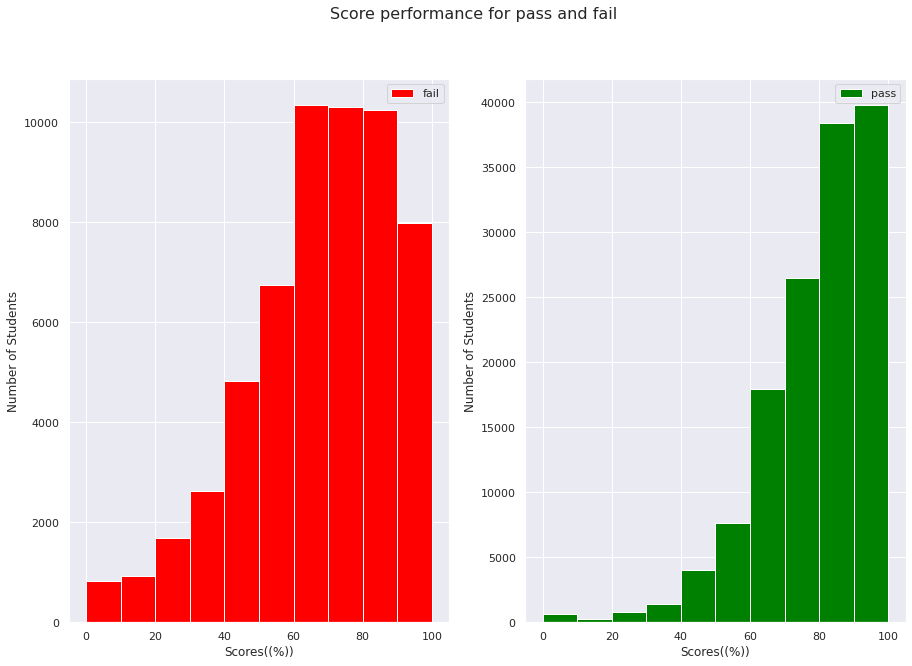

In [52]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Score performance for pass and fail', fontsize=16)
plt.subplot(1,2,1)
df_fail["score"].hist(color="red",label="fail")
plt.legend()
plt.xlabel("Scores((%))")
plt.ylabel("Number of Students")
plt.subplot(1,2,2)
df_pass["score"].hist(color="green",label="pass");
plt.xlabel("Scores((%))")
plt.ylabel("Number of Students")
plt.legend();

As expected the distribution of grades for people that fail shows a peak at the 60-70 interval while for the people that passed the peak is at a 100 (I assume is this high because there are many small scale assessments that are probably easy to score high). 

Let's look now at the submission time profile of the 2 groups, our expectation here is that the students that fail probably delivery sooner because we saw earlier that a slight negative correlation between number of days to submit and score performance.

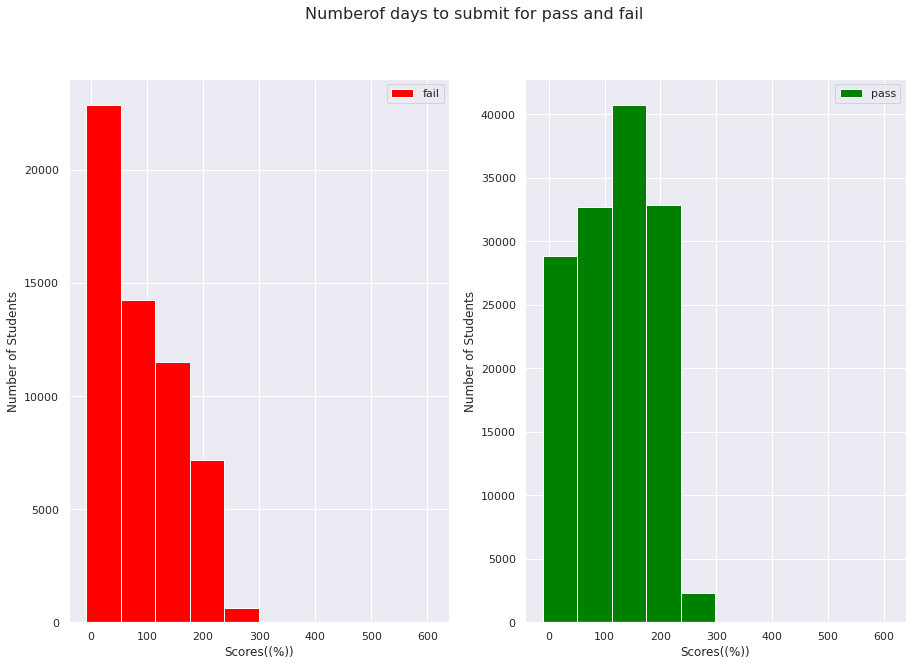

In [53]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Numberof days to submit for pass and fail', fontsize=16)
plt.subplot(1,2,1)
df_fail["date_submitted"].hist(color="red",label="fail")
plt.legend()
plt.xlabel("Scores((%))")
plt.ylabel("Number of Students")
plt.subplot(1,2,2)
df_pass["date_submitted"].hist(color="green",label="pass");
plt.xlabel("Scores((%))")
plt.ylabel("Number of Students")
plt.legend();

Indeed that is what we see here, with the students that fail or withdrawn delivering assessments much faster and we can clearly see a big difference in the 2 distributions, with the peak for the failed students skewed to the left at around 0 and 100 days and for the students that passed the peack is at 100 to 200 days. Let's confirm by printing the mean number of days to submit for both groups.

In [58]:
from scipy.stats import ttest_ind

mean_pass = df_pass["date_submitted"].mean()
mean_fail = df_fail["date_submitted"].mean()
print(f"Mean number of days to submit for students that passed: {mean_pass}")
print(f"Mean number of days to submit for students that failed or withdrawn: {mean_fail}")

ttest_ind(df_pass["date_submitted"],df_fail["date_submitted"], equal_var=False)

Mean number of days to submit for students that passed: 121.17744340123488
Mean number of days to submit for students that failed or withdrawn: 89.11735578113394


Ttest_indResult(statistic=91.87803726695681, pvalue=0.0)

In [57]:
len(df_fail["date_submitted"])

56546

A 30 days difference. Cool, now let's look at education levels. 

(-1.1105650363194888,
 1.1211419778694447,
 -1.1209229103682155,
 1.1192887918669214)

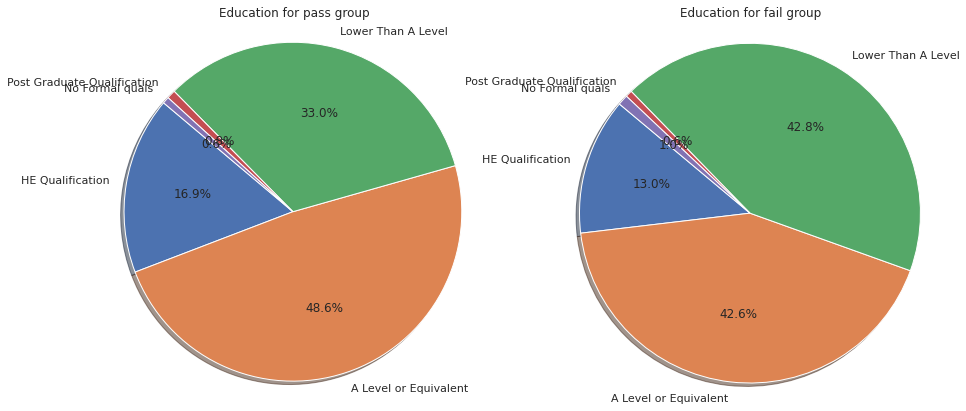

In [28]:
fig = plt.figure(figsize=(15,7))
labels = df_merged["highest_education"].unique()
sizes = [(df_pass["highest_education"]==l).sum() for l in labels]
plt.subplot(1,2,1)
plt.title("Education for pass group")
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

sizes = [(df_fail["highest_education"]==l).sum() for l in labels]
plt.subplot(1,2,2)
plt.title("Education for fail group")
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

The biggest difference that we observe here is that there are proportionaly more students with lower than A level education on the groups that fail (42.8%) in comparison to the groups that pass the course (33%).

Now let's look at possible age differences

['<=55', '35-55', '0-35']

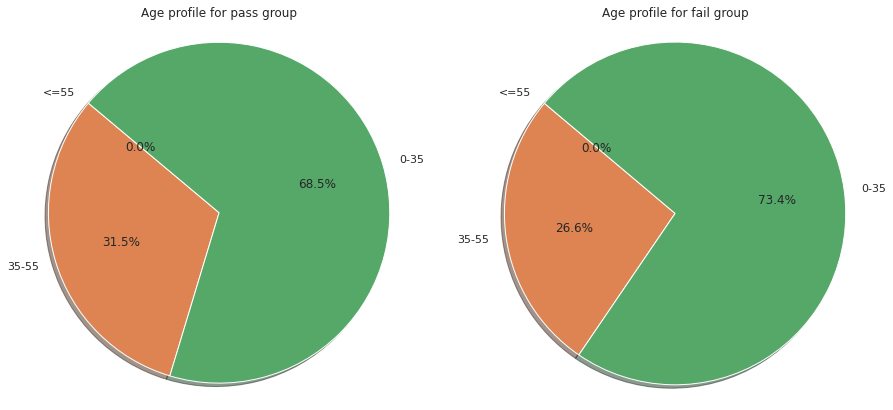

In [66]:
fig = plt.figure(figsize=(15,7))
labels = ["<=55" if l == "55<=" else l for l in df_merged["age_band"].unique()]
sizes = [(df_pass["age_band"]==l).sum() for l in labels]
plt.subplot(1,2,1)
plt.title("Age profile for pass group")
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
sizes = [(df_fail["age_band"]==l).sum() for l in labels]
plt.subplot(1,2,2)
plt.title("Age profile for fail group")
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal');

In the age department both groups seem to have a similar profile. Now, for the number of credits:

Now let's look at geographical reasons. The region where the student lived when taking the module-presentation.

dict_items([(15248, 'East Anglian Region'), (15420, 'Scotland'), (10082, 'South East Region'), (10282, 'West Midlands Region'), (8738, 'Wales'), (11033, 'North Western Region'), (14875, 'South Region'), (11665, 'South West Region'), (10214, 'East Midlands Region'), (8410, 'Yorkshire Region'), (13049, 'London Region'), (4141, 'North Region'), (4346, 'Ireland')])
*
[4141, 4346, 8410, 8738, 10082, 10214, 10282, 11033, 11665, 13049, 14875, 15248, 15420]
['North Region', 'Ireland', 'Yorkshire Region', 'Wales', 'South East Region', 'East Midlands Region', 'West Midlands Region', 'North Western Region', 'South West Region', 'London Region', 'South Region', 'East Anglian Region', 'Scotland']


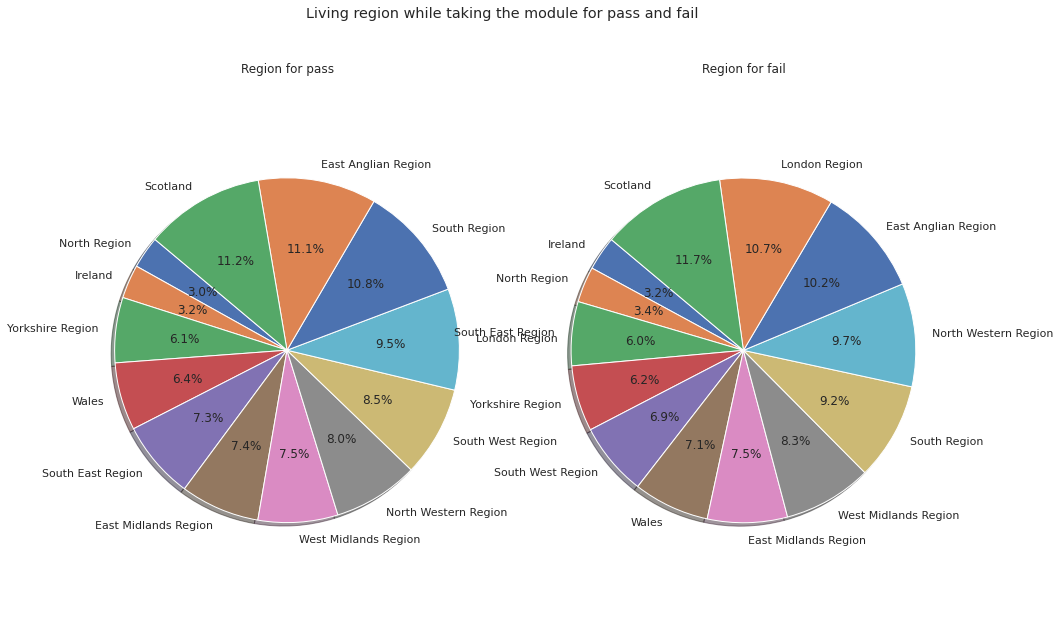

In [76]:
labels = df_merged["region"].unique()
sizes_pass = [(df_pass["region"]==l).sum() for l in labels]
sizes_labels_dict = dict(zip(sizes_pass,labels))
sorted_sizes_pass = sorted(sizes_pass)
labels_sorted_pass = [sizes_labels_dict[s] for s in sorted_sizes_pass]

fig = plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Region for pass")
plt.pie(sorted_sizes_pass,labels=labels_sorted_pass,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
#
sizes_fail = [(df_fail["region"]==l).sum() for l in labels]
sizes_labels_dict = dict(zip(sizes_fail,labels))
sorted_sizes_fail = sorted(sizes_fail)
labels_sorted_fail = [sizes_labels_dict[s] for s in sorted_sizes_fail]
plt.subplot(1,2,2)
plt.title("Region for fail")
plt.pie(sorted_sizes_fail,labels=labels_sorted_fail,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
fig.suptitle("Living region while taking the module for pass and fail");

Here when we look at the differences between regions we see small differences in the percentages with 1.6% more people living in the South Region doing better, 1.7% more people from North Western Region doing worst and other differences that could reflect other counfounding factors that are external to score performance.

Now, finally let's look at the `imd_band` which is in essence a measure of poverty for small areas, that is widely used in the UK. Before showing the pie chart let's just be clear on the index of multiple depravation. According to this [report](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/464430/English_Index_of_Multiple_Deprivation_2015_-_Guidance.pdf) by the department of communities and Local Government the index reflex the percentage of most deprived  to least deprived areas, so
as the number increases that means that the area is less deprived, so 10% most deprived will be the poorest area and 90-100% will be the least poor area.

In [79]:
labels = df_merged["imd_band"].unique()
labels_sorted = sorted(labels)
sizes_pass = [(df_pass["imd_band"]==l).sum() for l in labels_sorted]

array([90, 20, 50, 80, 30, 70, 60, 40, 10,  0])

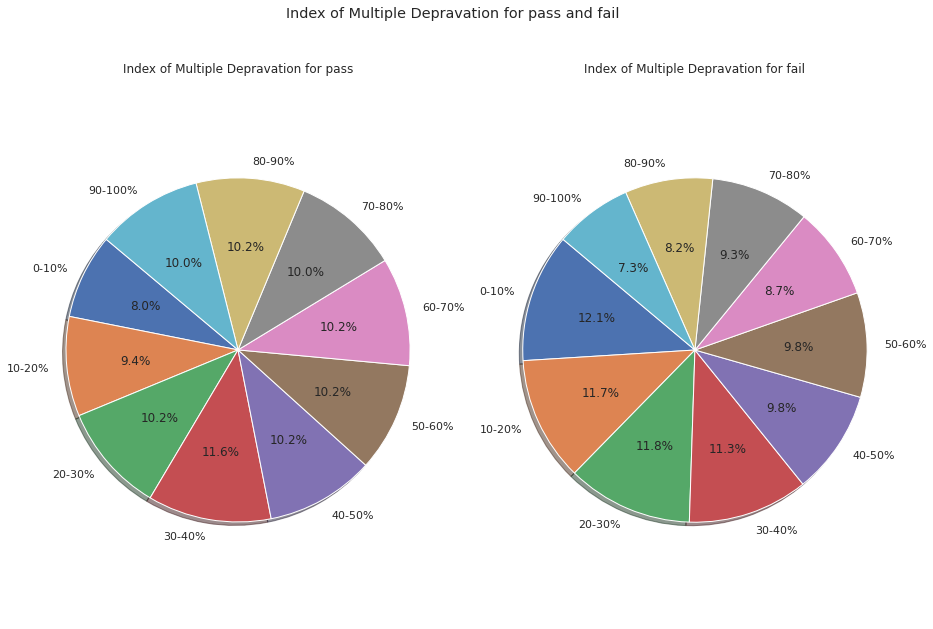

In [87]:
def change_to_percentage_label(x):
    return str(x) + "-" + str(x+10) + "%"
    
fig = plt.figure(figsize=(15,10))
labels = df_merged["imd_band"].unique()
labels_sorted = sorted(labels)
sizes_pass = [(df_pass["imd_band"]==l).sum() for l in labels_sorted]
labels_sorted_percentage = list(map(change_to_percentage_label,sorted(labels)))

plt.subplot(1,2,1)
plt.title("Index of Multiple Depravation for pass")
plt.pie(sizes_pass,labels=labels_sorted_percentage,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')


sizes_fail = [(df_fail["imd_band"]==l).sum() for l in labels_sorted]
plt.subplot(1,2,2)
plt.title("Index of Multiple Depravation for fail")
plt.pie(sizes_fail,labels=labels_sorted_percentage,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
fig.suptitle("Index of Multiple Depravation for pass and fail");

Here we finally see a lot of interesting things, the biggest differences that we can observe is on the 0-10% reflecting the poorest area where there are proportionally 4.1% more people that fail coming from the poorest area of the UK in comparison with the people that pass (12.1% of those who failed were from the poorest area versus 8% on the pass group). Similar for the 1-20% group where for the people that failed, 11.7% were from the second poorest region of the uk versus 9.4% in the pass case. 

The other interesting aspect is that on the other side of the spectrum, in the less deprivated areas these percentages change and we see that 10% of the people who passed were from the less poor area of the country versus 7.3% in the fail group. Similar for the second less poor area where we see 10.2% of the people who pass being from that group versus 8.2% in the fail case.

For me this seems to point to the best answer for my initial question regarding the profile of people who pass the course versus the ones that do not. But to try and get a sense for whether or not these apparent results actually have some possible effect, let's look at the relationship between score performance and poverty. To do that we will need to first change the `imd_band` to numerical to be able to run tests. 

In [32]:
def change_to_numerical(x):
    try:
        x = int(x.strip("%")[:2])
    except:
        x = int(x.strip("%")[:1])
    return x
df_merged["imd_band"] = df_merged["imd_band"].apply(change_to_numerical)

In [33]:
pearsonr(df_merged["imd_band"],df_merged["score"])

(0.08166717850681035, 2.3543308016802156e-284)

In the overall group of students we don't seem to see a strong correlation between score performance and poverty measure, finding a 8% positive correlation.

Let's now look at this correlation for the pass and fail cases separately:

In [34]:
pass_index = (df_merged["final_result"]=="Pass") | (df_merged["final_result"]=="Distinction")
df_pass = df_merged[pass_index]

fail_index = (df_merged["final_result"]=="Fail") | (df_merged["final_result"]=="Withdrawn")
df_fail = df_merged[fail_index]

pearsonr(df_pass["imd_band"],df_pass["score"])

(0.0642002991822996, 1.6041785827156085e-125)

In [35]:
pearsonr(df_fail["imd_band"],df_fail["score"])

(0.052778778980020466, 3.5499376419846515e-36)

Again weak correlations,to investigate this further let's look at the distributions of percentages of the imd_band rank to have a different perspective.

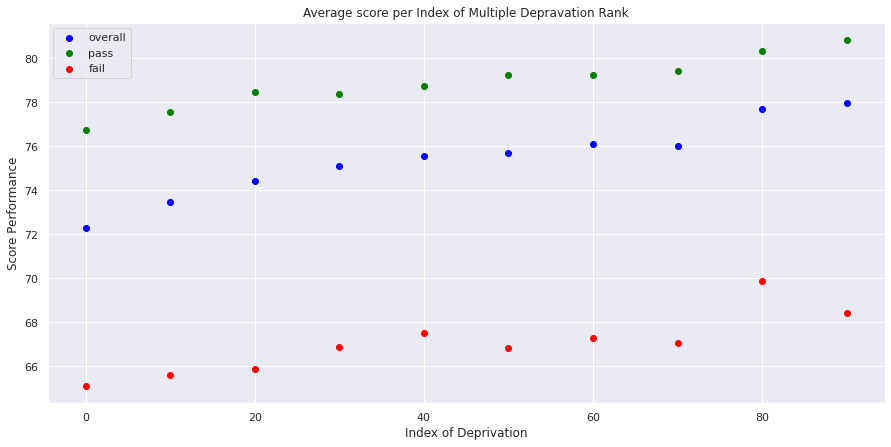

In [88]:
avg_score_per_imd_band_bin = df_merged.groupby("imd_band")["score"].mean()
sorted_imd_band_ranks = sorted(df_merged["imd_band"].unique())
plt.figure(figsize=(15,7))
plt.title("Average score per Index of Multiple Depravation Rank")
plt.scatter(sorted_imd_band_ranks,avg_score_per_imd_band_bin,label="overall",color="blue");
avg_score_per_imd_band_bin_pass = df_pass.groupby("imd_band")["score"].mean()
avg_score_per_imd_band_bin_fail = df_fail.groupby("imd_band")["score"].mean()
sorted_imd_band_ranks_pass = sorted(df_pass["imd_band"].unique())
plt.scatter(sorted_imd_band_ranks_pass,avg_score_per_imd_band_bin_pass,label="pass",color="green")
plt.scatter(sorted_imd_band_ranks_pass,avg_score_per_imd_band_bin_fail,label="fail", color="red");
plt.xlabel("Index of Deprivation")
plt.ylabel("Score Performance")
plt.legend();

Now we start to see some interesting information, we can observe that if we average the scores for each index group there is a very clear upward trend on the score performance as the conditions of the area improve, in other words, it seems that the score will be higher for the richer areas. 

When we look at both groups we see a similar trend but interestingly in the fail group we see more volatility in the 20-70 interval and a bigger jump in performance between 70-80 interval when compared to the pass group. 

To investigate this further let's fit a regression line to the overall score performance against the imd rank.

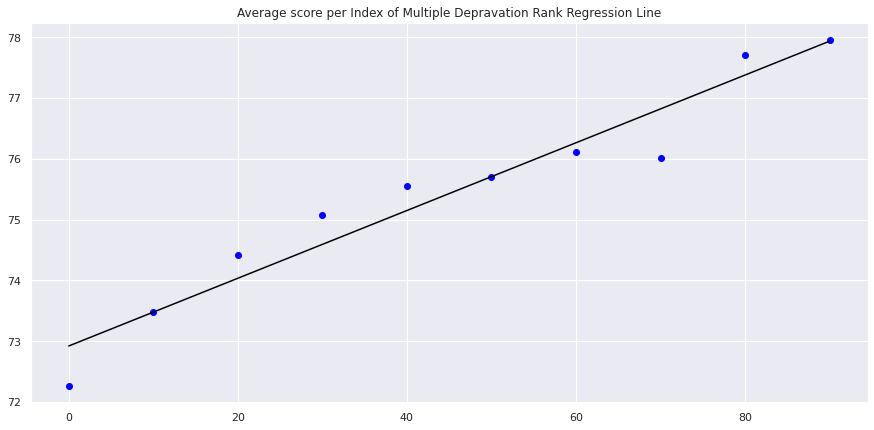

In [37]:
from sklearn.linear_model import LinearRegression

sorted_imd_band_ranks = np.array(sorted_imd_band_ranks)
avg_score_per_imd_band_bin = np.array(avg_score_per_imd_band_bin)
lr = LinearRegression()
lr.fit(sorted_imd_band_ranks.reshape(-1,1),avg_score_per_imd_band_bin.reshape(-1,1))
intercept = lr.intercept_
coef = lr.coef_

plt.figure(figsize=(15,7))
plt.title("Average score per Index of Multiple Depravation Rank Regression Line")
plt.scatter(sorted_imd_band_ranks,avg_score_per_imd_band_bin,label="overall",color="blue");
plt.plot(sorted_imd_band_ranks,(sorted_imd_band_ranks*coef+intercept).ravel(),color="black",label="regression line");

In [38]:
print(f"Slope of the Regression Line: {coef}")

Slope of the Regression Line: [[0.05571216]]


So here we see that we get a good fit and that for each increase of one point on the index of depravation 
we see an increase of about 0.055 on the score performance. Since we are fitting the regression line to the means of scores we lose information on the variability of the scores across imd ranks but for the purpose of this article let's stop here. 

To confirm these results let's use the `statsmodels` api to get a p-value for the regression test:

In [39]:
# source: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
import statsmodels.api as sm
from scipy import stats


X = sorted_imd_band_ranks
y = avg_score_per_imd_band_bin

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     115.2
Date:                Wed, 05 May 2021   Prob (F-statistic):           5.00e-06
Time:                        07:57:39   Log-Likelihood:                -5.5560
No. Observations:                  10   AIC:                             15.11
Df Residuals:                       8   BIC:                             15.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.9212      0.277    263.116      0.0

All right, we confirm that the p-value is less than 0.05 and that the regression fit is significant, although here we are limited by the fact that are fitting only 10 values corresponding to the means per imd interval, but for the purposes of this analysis this is enough evidence to conclude that the index of deprivation is a factor influencing the performance of the students. 

I think that this is good enough for a simple practice session! We started with a question or a set of simple questions that form a narrative, which in this case was to try to understand the profile of students that passed the course versus the ones that did not. Upon exploring the data we saw that one factor that might play a significant role was the rank of poverty in the area where the students lived while taking the course, and we showed that there was a positive correlation between score performance in the course and the measure of poverty in the region, with the least deprived regions performing better than the most deprived.

### Reconsider

Before wrapping up a data science practice session I like to reconsider what I did and ask myself whether or not the statistical arguments or models I used indeed were grounded in the data and reflected relevant information about it. In the case of this dataset I think they did, although if this was intended for research or for a professional report, there would be much more to do with respect to solidifying the arguments for the statements I made, elements that could be reconsidered:
- Plotting a regression line against the entire score and imd rank values to get information on the variability of the relationship between poverty and score performance

- Investigating more granular information on the statistical differences between pass and fail groups to find more arguments that corroborate my potential conclusions.

- Perhaps running some machine learning models like random forest and xgboost to see how easy it would be to classify students into fail or pass given the information available (minus the actual score performances of course)

These and other analysis could indeed be made and this final point in your data science practice is crucial to develop the necessary critical thinking skills about data analysis and statistics.

# Thoughts on practicing

As with everything, if you practice you get better. With data science I think is the same, if you practice you get better, the issue most people have is the time available to them to actually practice these skills everyday, given that a notebook like this one could take a few hours to put together. However I would say that one good strategy is to practice this template and use the questions to narrow down your analysis to fit the time slot you have available, so if you only have 30 minutes, you could ask a very simple question and answer it quickly even if the arguments won't be as good as they could. 

*__The most important thing is to practice the pipeline of gathering the data, exploring, cleaning, running analysis, presenting it in a way that tells a narrative, even is it is a really simple one.__*

---

If you liked this post connect with me on [Twitter](https://twitter.com/LucasEnkrateia), [LinkedIn](https://www.linkedin.com/in/lucas-soares-969044167/) and follow me on [Medium](https://lucas-soares.medium.com). 
Thanks and see you next time! :)


# References

- [Open University Learning Analytics dataset
](https://analyse.kmi.open.ac.uk/open_dataset)
- [kaggle api](https://github.com/Kaggle/kaggle-api)